Setup

In [26]:
import sys
import matplotlib.pyplot as plt

sys.path.append('../shared')

from decorators import *
from benchmarking import *

SEED = 42

Array generation for benchmarking:

In [27]:
from random import Random
from typing import List, Tuple

def exponential_yielder(start: int, end: int, step: int) -> int:
    i = start
    while i < end:
        yield i
        i *= step

def generate_random_array(seed: int, n: int, value_range: Tuple[int, int]) -> List[int]:
    rand = Random(seed)
    min_val, max_val = value_range
    return [rand.randint(min_val, max_val) for _ in range(n)]

array_sizes = list(exponential_yielder(100, 1_000_000, 2))

narrow_array_set = [generate_random_array(SEED, n, (0, 100)) for n in array_sizes]
wide_array_set = [generate_random_array(SEED, n, (0, 100000)) for n in array_sizes]

Sorting algorithms:

In [28]:
from sorting import quicksort, quicksort_median_pivot, merge_sort, radix_sort, heap_sort

def radix_4_sort(arr: List[int]) -> List[int]:
    return radix_sort(4)(arr)
def radix_10_sort(arr: List[int]) -> List[int]:
    return radix_sort(10)(arr)

Benchmarking:

In [29]:
sorts = [quicksort, quicksort_median_pivot, merge_sort, heap_sort, radix_4_sort, radix_10_sort]

result_narrow = benchmark_single_thread(sorts, narrow_array_set)
result_wide = benchmark_single_thread(sorts, wide_array_set)

Results:

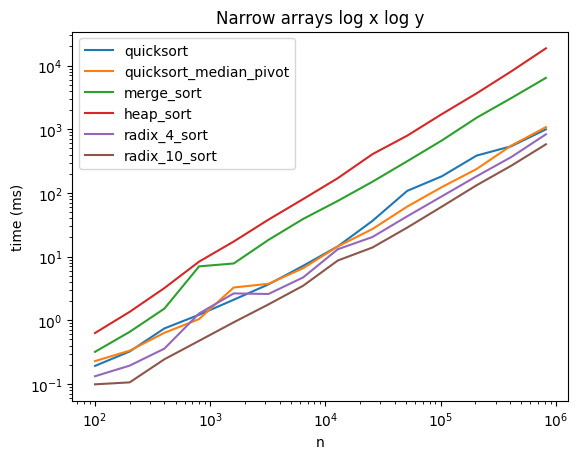

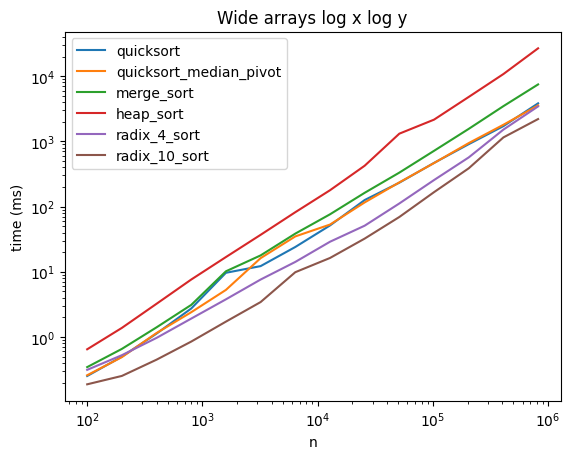

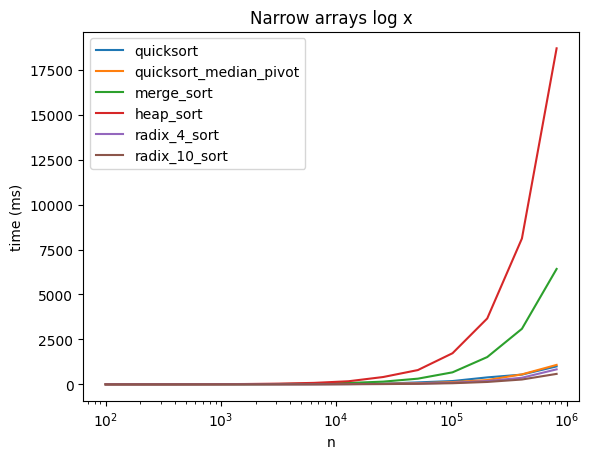

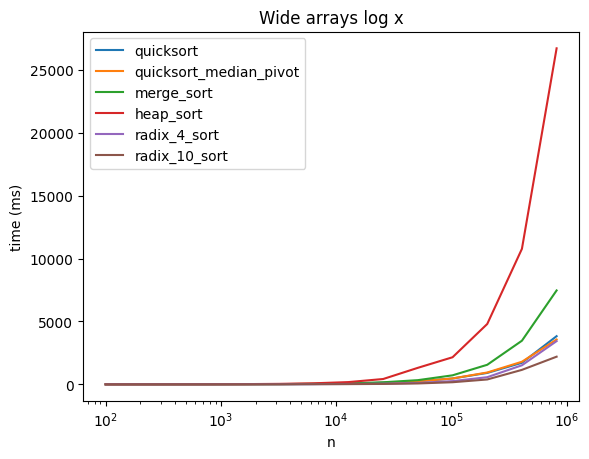

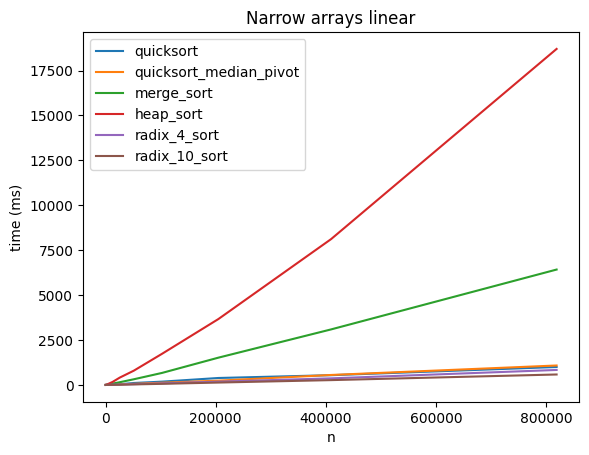

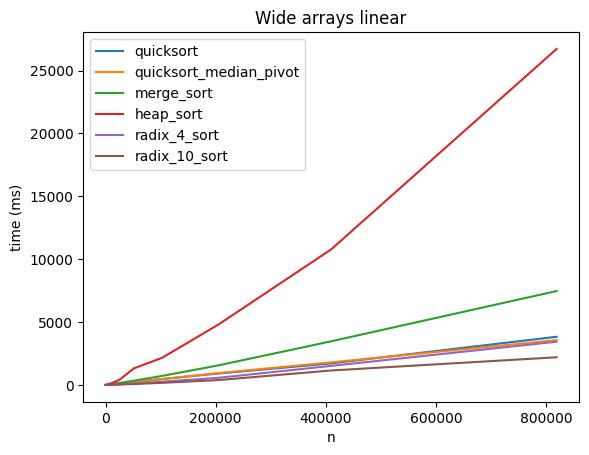

In [33]:
plot_results(result_narrow, array_sizes, isLog=True, isXLog=True, title="Narrow arrays log x log y")
plot_results(result_wide, array_sizes, isLog=True, isXLog=True, title="Wide arrays log x log y")

plot_results(result_narrow, array_sizes, isLog=False, isXLog=True, title="Narrow arrays log x")
plot_results(result_wide, array_sizes, isLog=False, isXLog=True, title="Wide arrays log x")

plot_results(result_narrow, array_sizes, isLog=False, isXLog=False, title="Narrow arrays linear")
plot_results(result_wide, array_sizes, isLog=False, isXLog=False, title="Wide arrays linear")